---
# Retroicor

Here I try to check if my retroicor implementation is correct using Catarina's physiology-data. 

In [123]:
from linescanning import utils,dataset,plotting,glm
import numpy as np
import os
import matplotlib.pyplot as plt 
from nilearn import signal
opj = os.path.join

project_dir = os.environ.get("DIR_PROJECTS")
base_dir = os.path.join(project_dir, 'hemifield')
deriv_dir = opj(base_dir, 'derivatives')

plot_vox = 240
plot_xkcd = False
np.set_printoptions(precision=3)


In [2]:
# Load data
sub         = '003'
ses         = 4
task        = "task-pRF"
run         = [2,5]
func_dir    = opj(base_dir, "testing", "retroicor_catarina")

Just load the data, highpass + zscore it

In [100]:
func_file   = utils.get_file_from_substring(["run1", ".mat"], func_dir)
func = dataset.Dataset(func_file,
                       deleted_first_timepoints=0, 
                       deleted_last_timepoints=0,
                       high_pass=True,
                       low_pass=False,
                       verbose=True,
                       use_bids=False)

data = func.fetch_fmri(dtype="zscore")
data


DATASET
Filter set to None, but high_pass=True, setting filter to 'highpass'

FUNCTIONAL
Preprocessing /mnt/d/FSL/shared/spinoza/projects/hemifield/testing/retroicor_catarina/Data_nopy_ecomb_Poser_run1_pilot3.mat
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]
 Data used for percent-change: 'highpass'

DATASET: created
Fetching dataframe from attribute 'df_func_zscore'


vox 0     vox 1     vox 2     vox 3     vox 4  \
subject run t                                                           
1       0   0.000   -1.305464  0.735259  2.249986  0.415609  1.450528   
            0.105   -0.589005 -0.244858  1.586183  0.657842  0.841189   
            0.210    0.853451 -0.096041 -0.180180 -2.414017 -0.899423   
            0.315    1.014173 -0.730263  0.574182 -0.410068 -0.616155   
            0.420   -0.058868 -0.971349  0.727283  0.986164  0.149182   
...                       ...       ...       ...       ...       ...   
            335.475  1.491400 -0.267017 -0.017247 -0.647464  2.227600   
            335.580  1.756954  0.359173  0.511698  0.664235  0.282824   
            335.685 -0.150549 -0.161319 -0.360986 -1.143578 -0.667140   
            335.790 -1.932699 -0.051573 -0.267036 -1.706082 -0.861064   
            335.895 -0.753438  1.743221  3.326471  0.073949 -0.166954   

                        vox 5     vox 6     vox 7     vox 8     vox 9  ...  \
subject run t                                                          ...   
1       0   0.000   -0.744354  0.365163 -1.160372  1.243690  0.260418  ...   
            0.105   -0.156805 -2.052009 -0.531070  1.226273 -0.009631  ...   
            0.210    0.585277 -0.190474  0.266620  1.024131  0.661136  ...   
            0.315    0.584879 -0.561278 -0.837104 -0.739421 -0.785409  ...   
            0.420    0.334113  2.013056  1.204239 -0.212595  0.404258  ...   
...                       ...       ...       ...       ...       ...  ...   
            335.475 -0.405889 -0.437994 -1.206547  0.983545  0.970389  ...   
            335.580 -0.520891 -0.493088 -1.463983  3.019987  1.679778  ...   
            335.685 -1.156206  0.242266  0.564202 -1.445173 -0.796974  ...   
            335.790  0.441711  0.048423  2.468686  0.737920  0.375365  ...   
            335.895  0.517111  1.995223  0.134514 -1.139563  1.646697  ...   

                      vox 710   vox 711   vox 712   vox 713   vox 714  \
subject run t                                                           
1       0   0.000    0.401009 -1.502845 -0.247230  0.197165 -1.103849   
            0.105   -0.500726  1.123226 -0.227056  0.207165  0.568562   
            0.210    0.157432 -1.378218 -0.879503 -0.558657  0.119088   
            0.315   -1.821353  0.789375  0.533053 -1.230147 -1.360142   
            0.420    1.601366 -1.051225  1.608512  0.383627 -0.827646   
...                       ...       ...       ...       ...       ...   
            335.475  0.581759  1.459737  0.406234 -0.726041 -0.275361   
            335.580 -0.217941  1.690536 -0.841229  2.348582 -0.864661   
            335.685 -0.719123  1.071138 -0.569345 -1.674253  1.434920   
            335.790 -1.013228  0.782243  1.149601 -0.748324 -0.207357   
            335.895 -1.349145 -0.554667 -1.639982  0.135813  1.319241   

                      vox 715   vox 716   vox 717   vox 718   vox 719  
subject run t                                                          
1       0   0.000    0.191601 -0.111991  1.237661  1.207779 -0.769246  
            0.105    0.864469 -1.108199 -1.543477  0.431911  0.696635  
            0.210   -0.059262  0.566770  0.086042  0.241452 -1.855164  
            0.315   -0.047962 -0.472963 -0.933581 -0.500147  1.748557  
            0.420    0.347557  0.592483 -0.159782  0.186247  2.017211  
...                       ...       ...       ...       ...       ...  
            335.475  1.688682  0.218704  0.814513 -0.887891 -1.120873  
            335.580 -0.679718 -0.213760 -0.525038  1.206097 -0.480311  
            335.685  1.371033  1.348449 -1.064581 -1.097316  0.372597  
            335.790  2.349008  0.884625  0.107159 -0.328134  0.902335  
            335.895 -1.240498 -0.014349 -0.648645  0.992096 -0.519891  

[3200 rows x 720 columns]

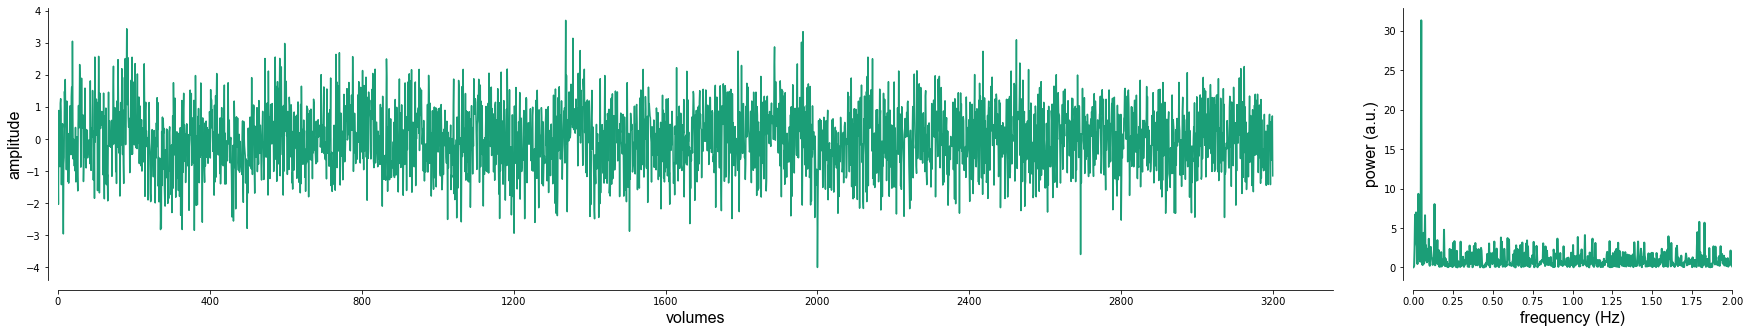

In [101]:
# timecourse
tc1 = data.groupby(['subject', 't']).mean()[f'vox {plot_vox}'].values

freq_type = "fft"
labels = ['unfiltered', 'aCompCor']
clipper = 10000

fig = plt.figure(figsize=(30,5))
gs = fig.add_gridspec(1,2, width_ratios=[20,5], wspace=0.1)

ax1 = fig.add_subplot(gs[0])
plotting.LazyPlot(tc1, 
                  color="#1B9E77",
                  x_label="volumes",
                  y_label="amplitude",                   
                  axs=ax1,
                  font_size=16,
                  line_width=1.5)

ax2 = fig.add_subplot(gs[1])
freq1 = func.get_freq(tc1, TR=0.105, spectrum_type=freq_type, clip_power=clipper)

plotting.LazyPlot(freq1[1],
                  xx=freq1[0],
                  color="#1B9E77",
                  x_label="frequency (Hz)",
                  y_label="power (a.u.)",
                  axs=ax2,
                  xkcd=False,
                  font_size=16,
                  x_lim=[0,2],
                  line_width=2)


Preprocess physiology-file with Lukas' `scanphyslog2bids` package:

In [8]:
from scanphyslog2bids.core import PhilipsPhysioLog

log_file = utils.get_file_from_substring("run1.log", opj(func_dir, 'physlog'))
out_dir = func_dir  # where the BIDSified data should be saved
deriv_dir = os.path.dirname(log_file)  # where some QC plots should be saved

# fmri_file is used to extract metadata, such as TR and number of volumes
n_dyns = data.shape[0]
tr = func.TR

# Create PhilipsPhysioLog object with info
phlog = PhilipsPhysioLog(f=log_file, tr=tr, n_dyns=n_dyns, sf=496, manually_stopped=False)

# Load in data, do some preprocessing
phlog.load()

# Try to align physio data with scan data, using a particular method
# (either "vol_markers", "gradient_log", or "interpolation")
phlog.align(trigger_method='interpolate')  # gradient_log will fail

# Write out BIDS files
phlog.to_bids(out_dir)  # writes out .tsv.gz and .json files

# Optional: plot some QC graphs for alignment and actual traces
phlog.plot_alignment(out_dir=deriv_dir)  # plots alignment with gradient
phlog.plot_traces(out_dir=deriv_dir)  # plots cardiac/resp traces

2022-03-06 09:56:00,025 [MainThread] [INFO   ]  Found end marker ('0020') at an offset of 21 samples relative to the end of the file.
2022-03-06 09:56:02,584 [MainThread] [WARNING]  No gradient detected, so have to assume the end marker is correct. Consider setting 'offset_end_scan'.
2022-03-06 09:56:02,585 [MainThread] [WARNING]  Last trigger is 0.04 sec (20 samples) longer than expected based on the end marker (after trimming).
2022-03-06 09:56:02,587 [MainThread] [INFO   ]  Found 3200 triggers with a mean duration of 0.10500 (0.00055)!
2022-03-06 09:56:03,201 [MainThread] [INFO   ]  Saving BIDS data to /mnt/d/FSL/shared/spinoza/projects/hemifield/testing/retroicor_catarina/SCANPHYSLOG20210414104642_run1.tsv.


Plot the heart rate and respiration traces

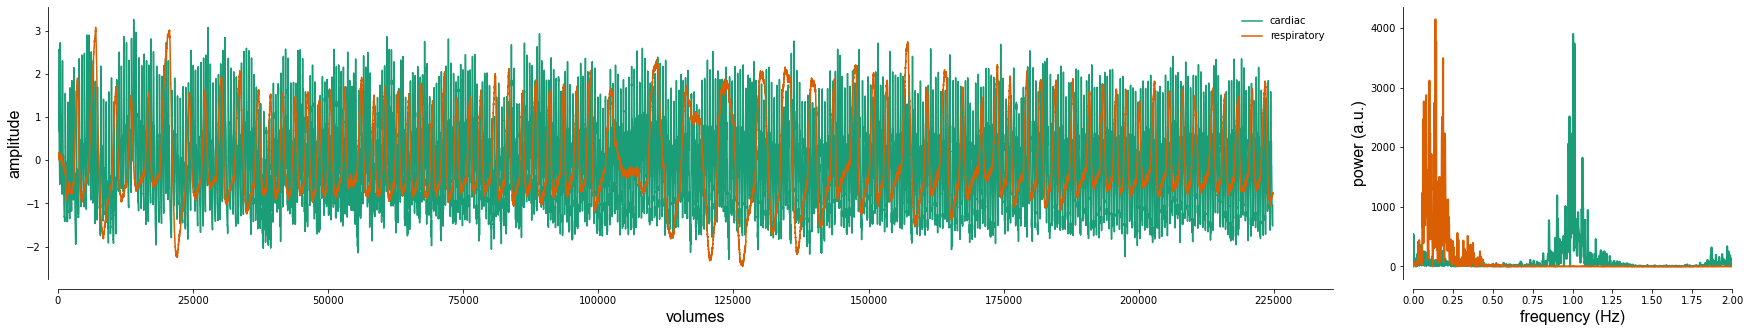

In [49]:
phys = np.loadtxt(utils.get_file_from_substring(".tsv", func_dir))

fs = 1/469

# z-score data
zscore_phys = signal.clean(phys, standardize=True, detrend=False)
tc1 = zscore_phys[:,0]
tc2 = zscore_phys[:,1]

freq_type = "fft"
labels = ['cardiac', 'respiratory']
colors = ["#1B9E77", "#D95F02"]
clipper = np.inf

fig = plt.figure(figsize=(30, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[20, 5], wspace=0.1)

ax1 = fig.add_subplot(gs[0])
plotting.LazyPlot([tc1,tc2],
                  x_label="volumes",
                  y_label="amplitude",
                  axs=ax1,
                  labels=labels,
                  color=colors,
                  font_size=16,
                  line_width=1.5)

ax2 = fig.add_subplot(gs[1])
freq1 = func.get_freq(tc1, TR=fs, spectrum_type=freq_type, clip_power=clipper)
freq2 = func.get_freq(tc2, TR=fs, spectrum_type=freq_type, clip_power=clipper)

plotting.LazyPlot([freq1[1], freq2[1]],
                  xx=freq1[0],
                  x_label="frequency (Hz)",
                  y_label="power (a.u.)",
                  axs=ax2,
                  color=colors,
                  xkcd=False,
                  font_size=16,
                  x_lim=[0, 2],
                  line_width=2)


Resample the traces to the sampling interval of the line-data and verify the resampling was OK

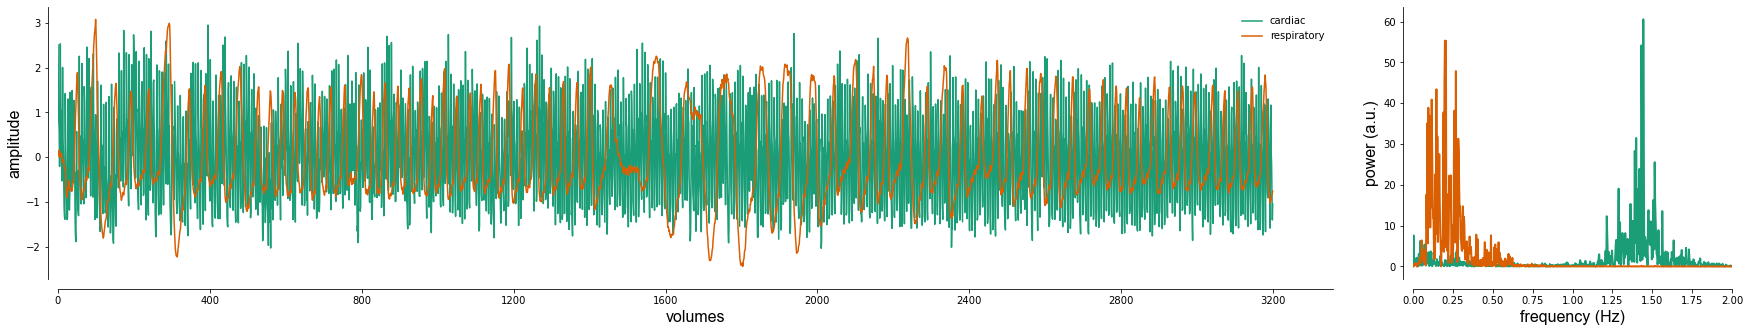

In [52]:
rs_cardiac = glm.resample_stim_vector(tc1, data.shape[0])
rs_resp = glm.resample_stim_vector(tc2, data.shape[0])

fig = plt.figure(figsize=(30, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[20, 5], wspace=0.1)

ax1 = fig.add_subplot(gs[0])
plotting.LazyPlot([rs_cardiac, rs_resp],
                  x_label="volumes",
                  y_label="amplitude",
                  axs=ax1,
                  labels=labels,
                  color=colors,
                  font_size=16,
                  line_width=1.5)

ax2 = fig.add_subplot(gs[1])
freq1 = func.get_freq(rs_cardiac, TR=func.TR, spectrum_type=freq_type, clip_power=clipper)
freq2 = func.get_freq(rs_resp, TR=func.TR,
                      spectrum_type=freq_type, clip_power=clipper)

plotting.LazyPlot([freq1[1], freq2[1]],
                  xx=freq1[0],
                  x_label="frequency (Hz)",
                  y_label="power (a.u.)",
                  axs=ax2,
                  color=colors,
                  xkcd=False,
                  font_size=16,
                  x_lim=[0, 2],
                  line_width=2)


I inserted the output from `scanphyslog2bids` into `PhysIO` to get the heart rate/respiration traces

In [63]:
from scipy.io import loadmat
phys_mat = loadmat(opj(func_dir, 'regressors.mat'))['physio']
hr = phys_mat['ons_secs'][0][0][0][0][12]
rvt = phys_mat['ons_secs'][0][0][0][0][13]


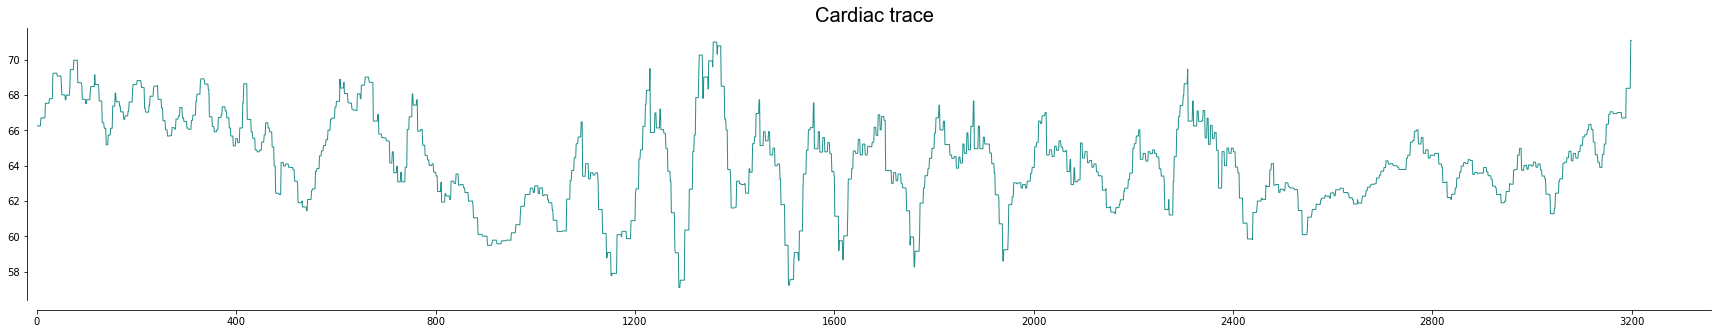

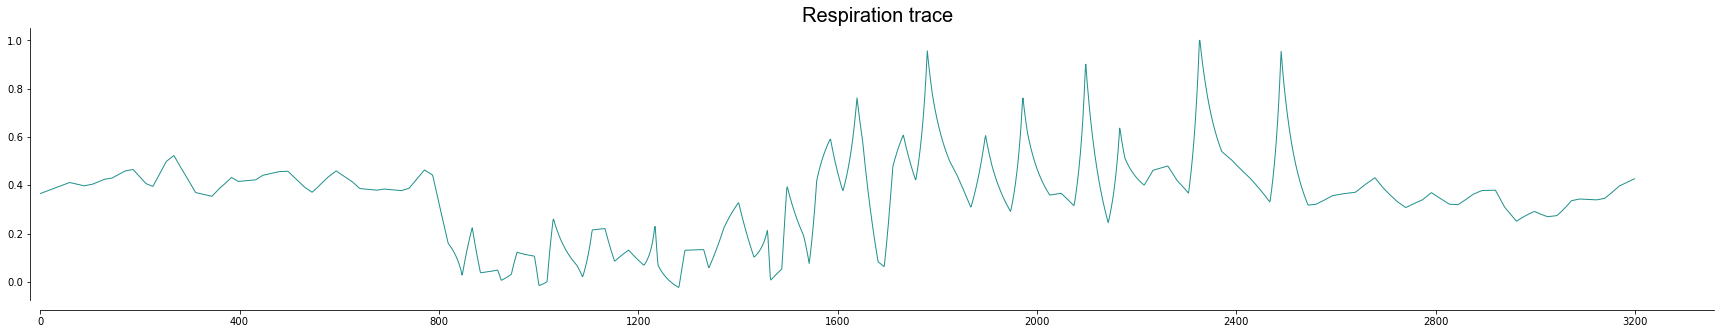

In [121]:
plotting.LazyPlot(hr, title="Cardiac trace", font_size=20)
plotting.LazyPlot(rvt, title="Respiration trace", font_size=20)


Now, insert the regressors from `PhysIO` into the `Dataset`-object to create a dataset without (`func_wo_retroicor`) and with (`func_w_retroicor`) RETROICOR

In [112]:
func_file   = utils.get_file_from_substring(["run1", ".mat"], func_dir)

# z-score no retroicor
physio = dataset.Dataset(func_file,
                         phys_file=opj(func_dir, 'regressors.txt'),
                         phys_mat=opj(func_dir, 'regressors.mat'),
                         deleted_first_timepoints=0, 
                         deleted_last_timepoints=0,
                         high_pass=True,
                         low_pass=False,
                         verbose=True,
                         retroicor=False,
                         use_bids=False)

func_wo_retroicor = func.fetch_fmri(dtype="zscore")

# z-score with retroicor
physio = dataset.Dataset(func_file,
                         phys_file=opj(func_dir, 'regressors.txt'),
                         phys_mat=opj(func_dir, 'regressors.mat'),
                         deleted_first_timepoints=0, 
                         deleted_last_timepoints=0,
                         high_pass=True,
                         low_pass=False,
                         verbose=True,
                         retroicor=True,
                         use_bids=False)

func_w_retroicor = func.fetch_fmri(dtype="retroicor")
data


DATASET
Filter set to None, but high_pass=True, setting filter to 'highpass'

PHYSIO
Preprocessing /mnt/d/FSL/shared/spinoza/projects/hemifield/testing/retroicor_catarina/regressors.txt

FUNCTIONAL
Preprocessing /mnt/d/FSL/shared/spinoza/projects/hemifield/testing/retroicor_catarina/Data_nopy_ecomb_Poser_run1_pilot3.mat
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]
 Data used for standardization: 'highpass'

DATASET: created
Fetching dataframe from attribute 'df_func_zscore'
DATASET
Filter set to None, but high_pass=True, setting filter to 'highpass'

PHYSIO
Preprocessing /mnt/d/FSL/shared/spinoza/projects/hemifield/testing/retroicor_catarina/regressors.txt

FUNCTIONAL
Preprocessing /mnt/d/FSL/shared/spinoza/projects/hemifield/testing/retroicor_catarina/Data_nopy_ecomb_Poser_run1_pilot3.mat
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]
 RETROICOR on 'high_passed_zscore'
(720, 3200)
 Data used for 

vox 0     vox 1     vox 2     vox 3     vox 4  \
subject run t                                                           
1       1   0.000   -1.323363  0.742853  2.327869  0.409129  1.461631   
            0.105   -0.488177 -0.243781  1.559980  0.739341  0.845741   
            0.210    0.813571 -0.105348 -0.254205 -2.387495 -0.880764   
            0.315    0.884661 -0.705843  0.515709 -0.374507 -0.625068   
            0.420   -0.022022 -0.970018  0.727672  1.067670  0.129668   
...                       ...       ...       ...       ...       ...   
            335.475  1.528139 -0.286501  0.007395 -0.680218  2.235378   
            335.580  1.714656  0.349819  0.529223  0.542031  0.292145   
            335.685 -0.042184 -0.197544 -0.355187 -1.164275 -0.719911   
            335.790 -1.842349 -0.132787 -0.183065 -1.750187 -0.885925   
            335.895 -0.811246  1.722687  3.437346 -0.013483 -0.153623   

                        vox 5     vox 6     vox 7     vox 8     vox 9  ...  \
subject run t                                                          ...   
1       1   0.000   -0.800107  0.375251 -1.193435  1.208735  0.229596  ...   
            0.105   -0.197334 -2.071104 -0.563110  1.205056 -0.034388  ...   
            0.210    0.545506 -0.116099  0.307667  0.970857  0.656422  ...   
            0.315    0.592245 -0.523464 -0.849052 -0.799493 -0.783073  ...   
            0.420    0.303347  1.988690  1.148027 -0.268305  0.376821  ...   
...                       ...       ...       ...       ...       ...  ...   
            335.475 -0.458823 -0.477744 -1.214564  0.988846  0.918327  ...   
            335.580 -0.507471 -0.527405 -1.522457  3.029569  1.689295  ...   
            335.685 -1.037891  0.182358  0.514645 -1.424744 -0.677306  ...   
            335.790  0.457335  0.107797  2.558653  0.723028  0.462805  ...   
            335.895  0.466854  2.033398  0.180812 -1.148645  1.633189  ...   

                      vox 710   vox 711   vox 712   vox 713   vox 714  \
subject run t                                                           
1       1   0.000    0.394195 -1.545613 -0.167199  0.239143 -1.102464   
            0.105   -0.574893  1.083046 -0.192422  0.231114  0.681361   
            0.210    0.146787 -1.508876 -0.854444 -0.577786  0.213605   
            0.315   -1.786832  0.685744  0.574027 -1.236036 -1.356073   
            0.420    1.592383 -1.040307  1.615633  0.445878 -0.843572   
...                       ...       ...       ...       ...       ...   
            335.475  0.579105  1.506978  0.352225 -0.646733 -0.308834   
            335.580 -0.214149  1.652855 -0.869955  2.358290 -0.898122   
            335.685 -0.690519  1.157863 -0.633941 -1.722876  1.459207   
            335.790 -0.922529  0.881304  1.097845 -0.769040 -0.206633   
            335.895 -1.284829 -0.547097 -1.608746  0.174307  1.279014   

                      vox 715   vox 716   vox 717   vox 718   vox 719  
subject run t                                                          
1       1   0.000    0.234704 -0.096832  1.244046  1.235111 -0.759030  
            0.105    0.916663 -1.096265 -1.494078  0.488094  0.692152  
            0.210   -0.048633  0.543220  0.103863  0.243003 -1.854584  
            0.315   -0.017403 -0.463342 -0.964197 -0.473659  1.789855  
            0.420    0.384054  0.605301 -0.181205  0.224614  2.071356  
...                       ...       ...       ...       ...       ...  
            335.475  1.677194  0.187944  0.812253 -0.905592 -1.090779  
            335.580 -0.686778 -0.217636 -0.541279  1.164810 -0.502022  
            335.685  1.370619  1.358563 -1.117602 -1.104304  0.271093  
            335.790  2.298626  0.828798  0.043723 -0.387856  0.808476  
            335.895 -1.248635 -0.045511 -0.673339  0.965896 -0.536656  

[3200 rows x 720 columns]

And plot a timecourse from both:

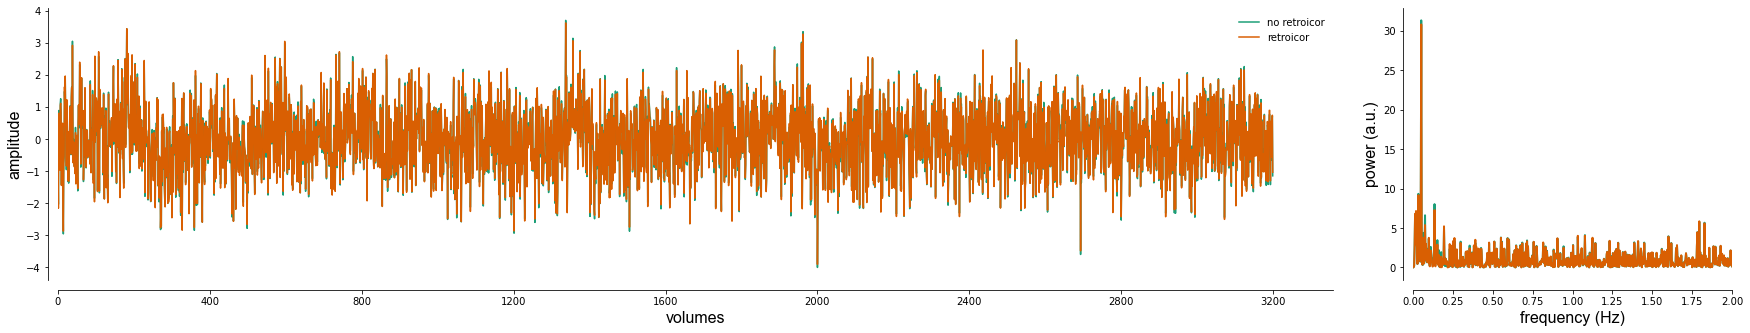

In [124]:
tc1 = func_wo_retroicor[f'vox {plot_vox}'].values
tc2 = func_w_retroicor[f'vox {plot_vox}'].values

freq_type = "fft"
labels = ['no retroicor', 'retroicor']
colors = ["#1B9E77", "#D95F02"]
clipper = np.inf

fig = plt.figure(figsize=(30, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[20, 5], wspace=0.1)

ax1 = fig.add_subplot(gs[0])
plotting.LazyPlot([tc1,tc2],
                  x_label="volumes",
                  y_label="amplitude",
                  axs=ax1,
                  labels=labels,
                  color=colors,
                  font_size=16,
                  line_width=1.5)

ax2 = fig.add_subplot(gs[1])
freq1 = func.get_freq(tc1, TR=0.105, spectrum_type=freq_type, clip_power=clipper)
freq2 = func.get_freq(
    tc2, TR=0.105, spectrum_type=freq_type, clip_power=clipper)

plotting.LazyPlot([freq1[1], freq2[1]],
                  xx=freq1[0],
                  x_label="frequency (Hz)",
                  y_label="power (a.u.)",
                  axs=ax2,
                  color=colors,
                  xkcd=False,
                  font_size=16,
                  x_lim=[0, 2],
                  line_width=2)


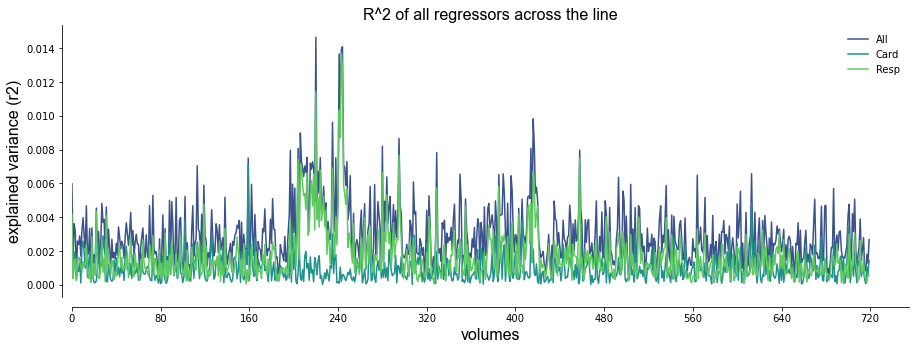

In [140]:
plotting.LazyPlot([func.r2_all,func.r2_cardiac,func.r2_resp],
                  x_label="volumes",
                  y_label="explained variance (r2)",
                  title="R^2 of all regressors across the line",
                  font_size=16,
                  labels=['All', 'Card', 'Resp'],
                  figsize=(15,5),
                  line_width=1.5)